In [1]:
from modelBase import *
from sympy import init_printing

# 将enum变量导入到全局
globals().update(ModelType.__members__)
globals().update(ModelSpec.__members__)
# sympy打印功能
init_printing()

# 模型一
# 可诱导启动子，Hill方程，有基底表达
exp1, paraList1, model1 = genModel(Inducible, [Repression, Hill, Basal_expression])
print("The expression for model 1 is:\n", exp1)
print("Required parameters:", paraList1)

# 模型二
# 同样是可诱导启动子，Hill系数为2以模拟二聚化，无基底表达。并且考虑诱导物：
# 考虑到Lac启动子系统，其中LacI为抑制子，而半乳糖为诱导物，此二者共同作用于pLac启动子上。此模型便是考虑到者二者的共同作用
exp2, _, model2 = genModel(Inducible, [
    Activation, Dimerized, No_basal_expression, Inducer, Inducer_Activation, Inducer_Michaelis_Menten
], plain_print=False)

The expression for model 1 is:
  n          n  
A *alpha + K *b
---------------
      / n    n\
 beta*\A  + K /
Required parameters: ['alpha', 'beta', 'b', 'K', 'n']


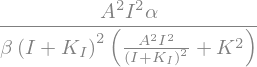

In [2]:
exp2

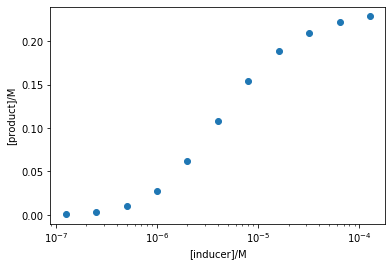

In [3]:
# 给模型二指定以下的参数：
# 转录因子（此处为激活子）浓度 [A] = 5.0uM，转录（以及翻译）活性 alpha = 2.0，降解速率 beta = 0.5
# （激活子的）解离常数，即米氏常数 K = 20.0uM，诱导物的米氏常数 K_I = 2.0 uM

# 考虑以下诱导物浓度梯度：[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128 (uM)

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

inducerGradient = np.array([x * 1E-6 for x in [0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128]])
product = model2(inducerGradient, {
    'A': 5.0E-6, 'alpha': 2.0, 'beta': 0.5, 'K': 20.0E-6, 'K_I': 2.0E-6 
})

# 绘制
fig, ax = plt.subplots()
ax.plot(inducerGradient, product, 'o')
ax.set_xscale('log')
ax.set_xlabel('[inducer]/M')
ax.set_ylabel('[product]/M')
plt.show()